In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nobel = pd.read_csv('Nobel.csv')

# Pandas

* Pandas allows for easy data operations with `numpy` like operations. 
* Data are organised in a dataframe or timeseries and allow for queries as in mySQL or spreadsheets.

In [17]:
nobel.sort_values(by='year').head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
307,293,Emil Adolf,von Behring,1854-03-15,1917-03-31,Prussia (now Poland),PL,Hansdorf (now Lawice),Germany,DE,Marburg,male,1901.0,medicine,NaN,1.0,"""for his work on serum therapy, especially its...",Marburg University,Marburg,Germany
484,462,Jean Henry,Dunant,1828-05-08,1910-10-30,Switzerland,CH,Geneva,Switzerland,CH,Heiden,male,1901.0,peace,NaN,2.0,NaN,NaN,NaN,NaN
485,463,Frédéric,Passy,1822-05-20,1912-06-12,France,FR,Paris,France,FR,Paris,male,1901.0,peace,NaN,2.0,NaN,NaN,NaN,NaN
589,569,Sully,Prudhomme,1839-03-16,1907-09-07,France,FR,Paris,France,FR,Châtenay,male,1901.0,literature,NaN,1.0,"""in special recognition of his poetic composit...",NaN,NaN,NaN


### What is the information we have about our nobel prize winners ?

In [21]:
for headers in nobel.columns:
    print(headers)

id
firstname
surname
born
died
bornCountry
bornCountryCode
bornCity
diedCountry
diedCountryCode
diedCity
gender
year
category
overallMotivation
share
motivation
name
city
country


### What are the different countries nobel prize winners are born?

In [59]:
for cnty in set(nobel.bornCountry):
    print(cnty)

nan
Russian Empire (now Latvia)
British India (now India)
Iceland
Belgium
Northern Ireland
Ireland
Russian Empire (now Lithuania)
Prussia (now Germany)
Brazil
France
Finland
Sweden
Chile
French Algeria (now Algeria)
Austria-Hungary (now Ukraine)
Hungary (now Slovakia)
Russian Empire (now Russia)
German-occupied Poland (now Poland)
Russian Empire (now Poland)
USSR (now Belarus)
Poland
Guatemala
W&uuml;rttemberg (now Germany)
China
Bosnia (now Bosnia and Herzegovina)
Lithuania
Germany (now Poland)
Poland (now Lithuania)
Russia
Free City of Danzig (now Poland)
Egypt
Korea (now South Korea)
Russian Empire (now Finland)
Spain
Austria
Crete (now Greece)
Poland (now Belarus)
Poland (now Ukraine)
East Timor
Italy
Ottoman Empire (now Republic of Macedonia)
Portugal
South Africa
Norway
Mecklenburg (now Germany)
Germany (now Russia)
USSR (now Russia)
Austrian Empire (now Czech Republic)
Nigeria
Austria-Hungary (now Poland)
Cyprus
Luxembourg
the Netherlands
USA
Austrian Empire (now Austria)
Persia

### Getting the nobel prize winner that are born in a specific country

In [30]:
nobel[nobel.bornCountry =='Iceland']

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
638,626,Halldór Kiljan,Laxness,1902-04-23,1998-02-08,Iceland,IS,Reykjavik,Iceland,IS,Reykjavik,male,1955.0,literature,NaN,1.0,"""for his vivid epic power which has renewed th...",NaN,NaN,NaN


### Get the histogram of the ages (at a precision of &pm; 1 year)

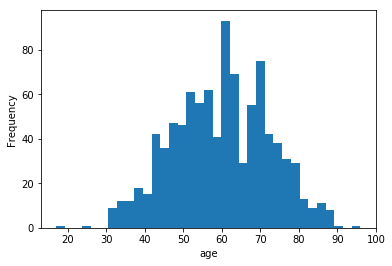

In [60]:
age = nobel.year - nobel.born.apply(lambda x: int(x[:4]))
ax = age[age < 1000].plot.hist(bins=35)
ax.set_xlabel('age');

### Gender dependency ?

In [70]:
g = nobel.gender.astype('category')
g.value_counts()
# g.plot.hist(bins=3)

male      925
female     53
org        27
Name: gender, dtype: int64

In [102]:
nobel['decennia'] = nobel.year.apply(lambda x: x // 10 * 10)
gdec = nobel.groupby(['decennia', 'gender'])
for (dec, g), group in gdec:
    print('In {}, there were {} {}s'.format(dec, group.size, g))
gdec.size()

In 1900.0, there were 63 females
In 1900.0, there were 1134 males
In 1900.0, there were 21 orgs
In 1910.0, there were 21 females
In 1910.0, there were 777 males
In 1910.0, there were 42 orgs
In 1920.0, there were 42 females
In 1920.0, there were 1092 males
In 1930.0, there were 63 females
In 1930.0, there were 1218 males
In 1930.0, there were 21 orgs
In 1940.0, there were 63 females
In 1940.0, there were 819 males
In 1940.0, there were 63 orgs
In 1950.0, there were 1638 males
In 1950.0, there were 21 orgs
In 1960.0, there were 63 females
In 1960.0, there were 1533 males
In 1960.0, there were 84 orgs
In 1970.0, there were 84 females
In 1970.0, there were 2142 males
In 1970.0, there were 21 orgs
In 1980.0, there were 84 females
In 1980.0, there were 1932 males
In 1980.0, there were 63 orgs
In 1990.0, there were 147 females
In 1990.0, there were 2037 males
In 1990.0, there were 63 orgs
In 2000.0, there were 252 females
In 2000.0, there were 2604 males
In 2000.0, there were 84 orgs
In 2010

decennia  gender
1900.0    female      3
          male       54
          org         1
1910.0    female      1
          male       37
          org         2
1920.0    female      2
          male       52
1930.0    female      3
          male       58
          org         1
1940.0    female      3
          male       39
          org         3
1950.0    male       78
          org         1
1960.0    female      3
          male       73
          org         4
1970.0    female      4
          male      102
          org         1
1980.0    female      4
          male       92
          org         3
1990.0    female      7
          male       97
          org         3
2000.0    female     12
          male      124
          org         4
2010.0    female     11
          male      113
          org         4
dtype: int64